<a href="https://colab.research.google.com/github/aschelin/SimulacoesAGFE/blob/main/SC_EDOs_OrdemSuperior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

# Sistemas de ordem superior

Neste tutorial, estenderemos as técnicas vistas até aqui para resolver alguns tipos de problemas de EDOs de ordem superior.

# Exemplo 1

Resolva a EDO de segunda ordem dada por:

\begin{equation}
\begin{aligned}
y^{\prime \prime}+y^{\prime}+y &=\cos (t) \\
y(0) &=1 \\
y^{\prime}(0) &=0
\end{aligned}
\end{equation}

Queremos transformar a equação diferencial em um sistema de equações de primeira ordem, portanto, fazemos $y^{\prime} =w$ e obtemos um sistema de duas EDOs de primeira ordem:

\begin{equation}
\begin{aligned}
y^{\prime} &=w \\
w^{\prime} &=-w-y+\cos (t) \\
y(0) &=1 \\
w(0) &=0
\end{aligned}
\end{equation}

In [ ]:
# Escrevemos o sistema de EDOs na nossa função derivadas:
def derivadas(t,X):
  F = np.zeros(2)
  F[0] = -X[1]
  F[1] = -X[1]-X[0]+np.cos(t)
  return F

In [ ]:
# Parametros 

h = 1e-2
tfim = 10
nt = int(tfim/h)
y0 = 1
w0 = 0
s0 = [y0,w0]

In [ ]:
def Euler_geral(derivadas,h,s0,tmax=10):
  nt = int(tmax/h)
  X = np.zeros([nt,2])
  tempo = np.linspace(0,tmax,nt)
  X[0,:] = s0
    
  for k in np.arange(1,nt):
      F = derivadas(tempo[k-1],X[k-1,:])
      X[k,0] = X[k-1,0] + h*F[0] 
      X[k,1] = X[k-1,1] + h*F[1]

  return tempo,X

In [ ]:
tempo,X = Euler_geral(derivadas,h,[1,0],3)

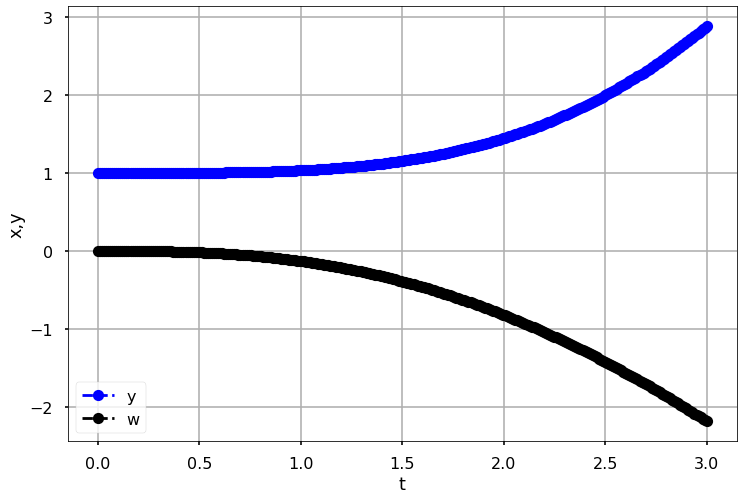

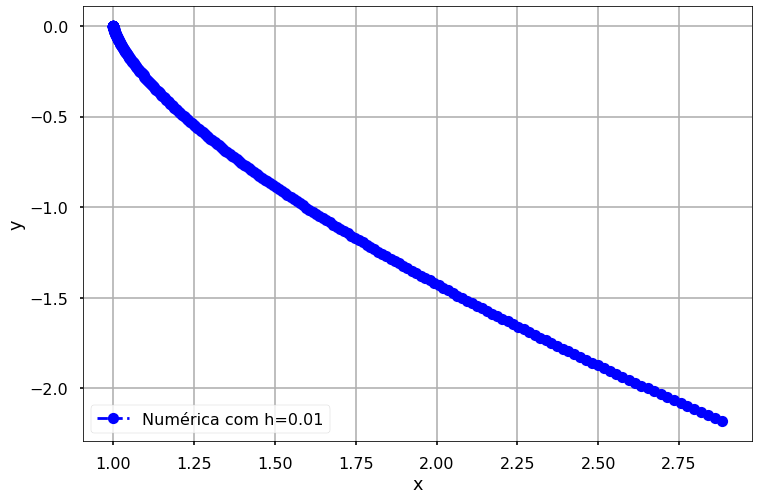

In [ ]:
  plt.figure(figsize = (12, 8))
  plt.plot(tempo,X[:,0], 'bo--', label='y')
  plt.plot(tempo,X[:,1], 'ko--', label='w')
  plt.xlabel('t')
  plt.ylabel('x,y')
  plt.grid()
  plt.legend(loc='lower left') 

  plt.figure(figsize = (12, 8))
  plt.plot(X[:,0],X[:,1], 'bo--', label='Numérica com h={}'.format(h))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()
  plt.legend(loc='lower left')
  plt.show() 

In [ ]:
def Euler_mod_geral(derivadas,h,s0,tmax=10):
  nt = int(tmax/h)
  X = np.zeros([nt,2])
  tempo = np.linspace(0,tmax,nt)
  X[0,:] = s0
    
  for k in np.arange(1,nt):
      F = derivadas(tempo[k-1],X[k-1,:])
      kx1 = F[0] 
      ky1 = F[1]

      x_euler = X[k-1,0] + h*kx1
      y_euler = X[k-1,1] + h*ky1

      Fnew = derivadas(tempo[k-1],[x_euler,y_euler])

      kx2 = Fnew[0] 
      ky2 = Fnew[1]

      X[k,0] = X[k-1,0] + h*(kx1+kx2)/2 
      X[k,1] = X[k-1,1] + h*(ky1+ky2)/2
  return tempo,X

In [ ]:
tempo,X = Euler_mod_geral(derivadas,h,[1,0],3)

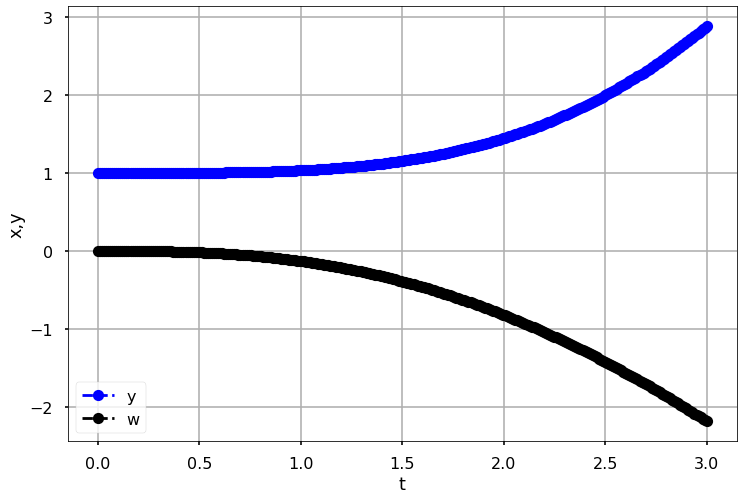

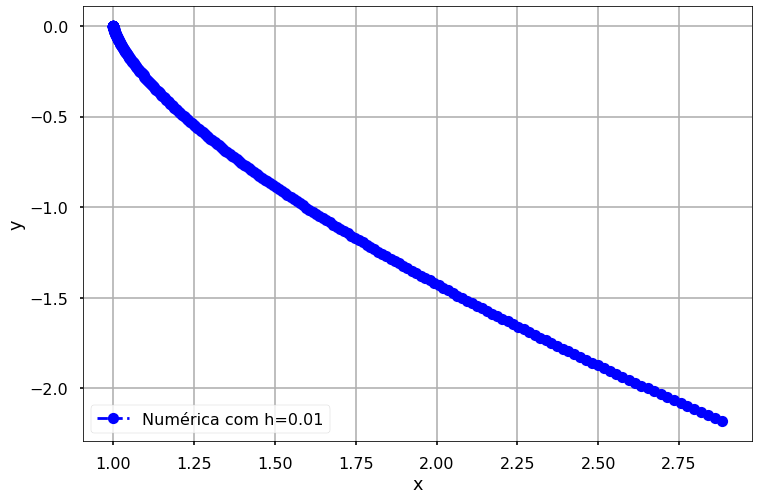

In [ ]:
  plt.figure(figsize = (12, 8))
  plt.plot(tempo,X[:,0], 'bo--', label='y')
  plt.plot(tempo,X[:,1], 'ko--', label='w')
  plt.xlabel('t')
  plt.ylabel('x,y')
  plt.grid()
  plt.legend(loc='lower left') 
  
  plt.figure(figsize = (12, 8))
  plt.plot(X[:,0],X[:,1], 'bo--', label='Numérica com h={}'.format(h))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid()
  plt.legend(loc='lower left')
  plt.show() 